In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import haversine as hs
from datetime import datetime
import seaborn as sns
import plotly.express as px
from scipy import stats

from utils.util_functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
df = pd.read_csv("data/outlogic2022_ha10_nf.csv")
df = df[df["device_id"].notna()]
df

/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,Country_right,Road_right,Length,START_X,START_Y,END_X,END_Y,ID_1,Area,location_dt
0,104,759,d581a938c7c2b0b201d6d5cc2b5775adc6f22265e1826b...,AAID,2022-04-21 12:54:01+00:00,2022-04-21 07:54:01,5.765943,-72.971240,CO-BOY,1.4,...,Colombia,Briceno_Tunja_Sogamoso,4893.849,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN
1,43545,4991,b12fe89c72dd75edc71cf448683103a077ef24026648bb...,AAID,2022-04-21 23:53:55+00:00,2022-04-21 18:53:55,5.756564,-72.967430,CO-BOY,5.7,...,Colombia,Briceno_Tunja_Sogamoso,4893.849,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN
2,45689,10019,418a934d5f49cd24052757575f540610cd316e39bfd710...,IDFA,2022-04-21 21:59:45+00:00,2022-04-21 16:59:45,5.767820,-72.972010,CO-BOY,4.7,...,Colombia,Briceno_Tunja_Sogamoso,4893.849,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN
3,120887,6885,8656073075e8ff9cc53459694fdd7c5fb54074bdcf1864...,AAID,2022-04-21 21:17:08+00:00,2022-04-21 16:17:08,5.762593,-72.969930,CO-BOY,1.9,...,Colombia,Briceno_Tunja_Sogamoso,4893.849,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN
4,135658,6209,1b82761fe0aeb548f1643cc57a3f0ba81917f881488f5d...,AAID,2022-04-21 12:29:08+00:00,2022-04-21 07:29:08,5.751986,-72.962540,CO-BOY,1.5,...,Colombia,Briceno_Tunja_Sogamoso,4893.849,-72.939896,5.753012,-72.972518,5.768947,196,37469.780716,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346367,1257412,2230,f7cca1c4d8d071e7f53f3c24a17328a886c5c9e5ef5541...,AAID,2022-01-02 19:20:59+00:00,2022-01-02 14:20:59,9.393563,-73.539290,CO-CES,9.9,...,Colombia,Cienaga_San_Roque,5226.661,-73.532785,9.370922,-73.545969,9.416322,54,39490.927703,2022-01-02
1346368,1339771,881,f7cca1c4d8d071e7f53f3c24a17328a886c5c9e5ef5541...,AAID,2022-01-02 19:21:46+00:00,2022-01-02 14:21:46,9.384047,-73.536480,CO-CES,9.9,...,Colombia,Cienaga_San_Roque,5226.661,-73.532785,9.370922,-73.545969,9.416322,54,39490.927703,2022-01-02
1346369,1222344,1884,752972f0e240d8c8af1eda7c31415f7a23b6b0692e849a...,AAID,2022-01-02 20:26:27+00:00,2022-01-02 15:26:27,10.083408,-73.732540,CO-CES,4.0,...,Colombia,Bolivar_Valledupar,429.115,-73.732051,10.084953,-73.733225,10.081255,333,5911.769890,2022-01-02
1346370,1326618,2118,e2ae6e4f8d11dd2b378e53a95d3c44533cdac232498c5c...,AAID,2022-01-02 16:16:46+00:00,2022-01-02 11:16:46,9.867915,-74.563240,CO-MAG,3.8,...,Colombia,Bolivar_Valledupar,2496.697,-74.574498,9.873062,-74.555263,9.862772,246,19540.767922,2022-01-02


In [6]:
# df.columns

In [92]:
df.sort_values(by = ["device_id", "local_location_at"], inplace = True)
df

,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,Country_right,Road_right,Length,START_X,START_Y,END_X,END_Y,ID_1,Area,location_dt
1104141,327783,2360,0003eaece7f519ffc34b01269dfbff0fea127d67f6a967...,AAID,2022-01-18 12:58:43+00:00,2022-01-18 07:58:43,5.758182,-72.906150,CO-BOY,1.5,...,Colombia,Briceno_Tunja_Sogamoso,2828.419,-72.910005,5.763305,-72.888006,5.758724,148,34812.774977,2022-01-18
1085916,595019,1502,0003eaece7f519ffc34b01269dfbff0fea127d67f6a967...,AAID,2022-01-19 13:47:55+00:00,2022-01-19 08:47:55,5.758024,-72.905556,CO-BOY,4.2,...,Colombia,Briceno_Tunja_Sogamoso,2812.820,-72.888061,5.758871,-72.910039,5.763389,197,34527.715038,2022-01-19
1085917,619549,1832,0003eaece7f519ffc34b01269dfbff0fea127d67f6a967...,AAID,2022-01-19 13:47:57+00:00,2022-01-19 08:47:57,5.758023,-72.905556,CO-BOY,4.0,...,Colombia,Briceno_Tunja_Sogamoso,2812.820,-72.888061,5.758871,-72.910039,5.763389,197,34527.715038,2022-01-19
1085923,986901,2335,0003eaece7f519ffc34b01269dfbff0fea127d67f6a967...,AAID,2022-01-19 13:47:59+00:00,2022-01-19 08:47:59,5.758023,-72.905556,CO-BOY,3.8,...,Colombia,Briceno_Tunja_Sogamoso,2812.820,-72.888061,5.758871,-72.910039,5.763389,197,34527.715038,2022-01-19
1085928,1155476,1442,0003eaece7f519ffc34b01269dfbff0fea127d67f6a967...,AAID,2022-01-19 13:48:01+00:00,2022-01-19 08:48:01,5.758023,-72.905556,CO-BOY,3.7,...,Colombia,Briceno_Tunja_Sogamoso,2812.820,-72.888061,5.758871,-72.910039,5.763389,197,34527.715038,2022-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118412,1823660,6758,fffde4173a61da19b6573ab8e7cffae0a099c3574323de...,AAID,2022-04-13 01:05:48+00:00,2022-04-12 20:05:48,5.397130,-73.486000,CO-BOY,6.3,...,Colombia,Briceno_Tunja_Sogamoso,4243.867,-73.495580,5.394609,-73.464197,5.411528,136,59774.498402,NaN
125015,1742545,6137,fffde4173a61da19b6573ab8e7cffae0a099c3574323de...,AAID,2022-04-13 01:13:59+00:00,2022-04-12 20:13:59,5.460434,-73.418790,CO-BOY,3.8,...,Colombia,Briceno_Tunja_Sogamoso,4395.079,-73.445707,5.437560,-73.418503,5.460717,134,58587.337866,NaN
114155,819448,259,fffde4173a61da19b6573ab8e7cffae0a099c3574323de...,AAID,2022-04-13 01:14:54+00:00,2022-04-12 20:14:54,5.468206,-73.412780,CO-BOY,6.7,...,Colombia,Briceno_Tunja_Sogamoso,6235.159,-73.391652,5.484953,-73.418550,5.460853,186,84410.237673,NaN
122347,397465,8673,fffde4173a61da19b6573ab8e7cffae0a099c3574323de...,AAID,2022-04-13 01:18:52+00:00,2022-04-12 20:18:52,5.483895,-73.390040,CO-BOY,3.8,...,Colombia,Briceno_Tunja_Sogamoso,3528.644,-73.391658,5.484776,-73.367648,5.502172,112,51020.970102,NaN


In [93]:
counts = df['device_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
counts = counts[counts["counts"] >1]
counts

,unique_values,counts
9626,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,5
9627,22d130b4a482bb89a96c42d51ecfaf2848e97c07634d32...,5
9628,d9ac62ae0de664f6e26dee5baed20db77b7534c80b20d9...,5
9629,da5d1c1c27dacb90d47b358c0a40745929a7a1220d81f7...,5
9630,627925d7d57b983848e9cb12cad58e9f5dfaeccab42bd2...,5
...,...,...
12347,c473e2eb4d9a7d055353fd7cc3e90fa349375e0c8474ec...,2
12348,bd78c30118b9fdbd934c49b95c7464f181c8404192d1bd...,2
12349,bd8623bfdd2d6f2aa984417792261ddc11c0503ec58b8e...,2
12350,c444dcd54bb65a1262e6dad67e64825040983584df2e63...,2


In [94]:
# Codigo lento. Debe mejorarse. 

for i, str_id in enumerate(counts["unique_values"].values):
    df_id = df[df["device_id"] == str_id].sort_values(by = ["local_location_at"])
    # display(df_id.head(6))

    df_id_top = df_id.iloc[:-1].reset_index(drop=True)
    df_id_bot = df_id.iloc[1:][["local_location_at", "latitude", "longitude"]].reset_index(drop=True)
    df_id_bot.columns = ["local_location_at_FIN", "latitude_FIN", "longitude_FIN"]
    # display(df_id_top)
    # display(df_id_bot)

    df_id_wfin = pd.concat([df_id_top, df_id_bot], axis=1)
    df_id_wfin["local_location_at"] = df_id_wfin["local_location_at"].astype("datetime64")
    df_id_wfin["local_location_at_FIN"] = df_id_wfin["local_location_at_FIN"].astype("datetime64")
    df_id_wfin["t"] = (df_id_wfin["local_location_at_FIN"] - df_id_wfin["local_location_at"]).dt.total_seconds()
    df_id_wfin["distance"] = df_id_wfin.apply(lambda x: hs.haversine((x.latitude, x.longitude), (x.latitude_FIN, x.longitude_FIN)), axis = 1)
    df_id_wfin["vel"] = 3600 * (df_id_wfin["distance"] / df_id_wfin["t"])
    
    if i > 0:
        df_id_wfin = pd.concat([df_id_wfin,df_id_fin])
        df_id_fin = df_id_wfin
    else:
        df_id_fin = df_id_wfin
        
    if i%500 == 0:
        print(i)
        

0
500
1000
1500
2000
2500


In [65]:
# df_id_fin.to_csv("outputs/all_traj_id_vels.csv", index = False)

# Inicio

In [196]:
df_id_fin = pd.read_csv("outputs/all_traj_id_vels_new.csv")
df_id_fin = df_id_fin[df_id_fin["t"] != 0]
df_id_fin = df_id_fin[(df_id_fin["vel"].notna()) & (df_id_fin["vel"] < 150) & (df_id_fin["vel"] > 15)]
df_id_fin = df_id_fin[df_id_fin["t"] < 10800]

df_id_fin

/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.



,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,END_Y,ID_1,Area,location_dt,local_location_at_FIN,latitude_FIN,longitude_FIN,t,distance,vel
0,125053,4035,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 13:09:21+00:00,2022-03-01 08:09:21,10.969608,-74.182620,CO-MAG,3.8,...,10.962753,1,44520.346685,2022-03-01,2022-03-01 08:20:25,10.882491,-74.152910,664.0,10.215642,55.386009
1,1251610,1265,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 13:20:25+00:00,2022-03-01 08:20:25,10.882491,-74.152910,CO-MAG,9.9,...,10.855345,12,30471.651670,2022-03-01,2022-03-01 08:40:00,10.741944,-74.105050,1175.0,16.479183,50.489411
3,632010,4901,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 19:05:23+00:00,2022-03-01 14:05:23,10.441351,-73.265205,CO-CES,9.9,...,10.433525,280,50633.075221,2022-03-01,2022-03-01 14:06:46,10.433448,-73.271140,83.0,1.092463,47.383947
4,515635,1055,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 19:06:46+00:00,2022-03-01 14:06:46,10.433448,-73.271140,CO-CES,3.8,...,10.402182,305,38170.561932,2022-03-01,2022-03-01 14:08:07,10.424854,-73.278030,81.0,1.216930,54.085791
5,2043956,7786,17a70b53857dc57162f1486c9ce3db0cb6c20c60e077bd...,AAID,2022-03-11 13:08:41+00:00,2022-03-11 08:08:41,4.952121,-73.941025,CO-CUN,1.7,...,4.952360,105,23279.986702,NaN,2022-03-11 08:08:43,4.952270,-73.940670,2.0,0.042674,76.813950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291864,616853,209,22d130b4a482bb89a96c42d51ecfaf2848e97c07634d32...,AAID,2022-03-30 13:44:18+00:00,2022-03-30 08:44:18,5.658992,-73.276560,CO-BOY,4.8,...,5.634417,188,53356.720442,NaN,2022-03-30 08:45:40,5.651923,-73.284350,82.0,1.166616,51.217295
1291866,966742,1267,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:01:08+00:00,2022-03-19 07:01:08,10.668296,-74.160990,CO-MAG,5.9,...,10.661744,17,19043.563646,NaN,2022-03-19 07:08:18,10.734808,-74.121025,430.0,8.588676,71.905191
1291867,1673348,6705,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:08:18+00:00,2022-03-19 07:08:18,10.734808,-74.121025,CO-MAG,5.6,...,10.726773,15,23537.133711,NaN,2022-03-19 07:33:31,10.928427,-74.163080,1513.0,22.013952,52.379530
1291868,28223,2735,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:33:31+00:00,2022-03-19 07:33:31,10.928427,-74.163080,CO-MAG,9.9,...,10.942147,100,23770.430211,NaN,2022-03-19 07:38:02,10.962273,-74.175040,271.0,3.983573,52.918310


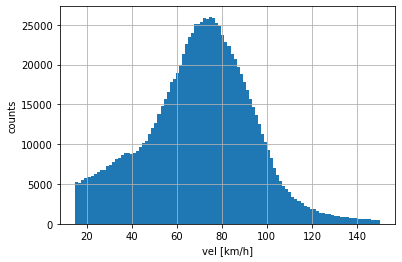

In [197]:
df_id_fin["vel"].hist(bins = 100)
# plt.xscale("log")
plt.xlabel("vel [km/h]")
plt.ylabel("counts")
plt.show()

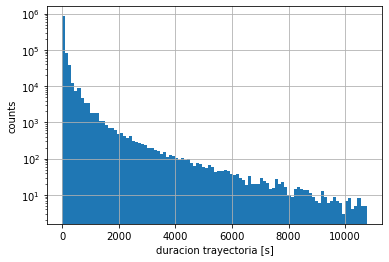

In [198]:
df_id_fin["t"].hist(bins = 100)
# plt.xscale("log")
plt.yscale("log")

plt.ylabel("counts")
plt.xlabel("duracion trayectoria [s]")
plt.show()

In [202]:
df = df_id_fin.copy()
df.loc[:,'date_1']=df['local_location_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #convert str to timestamp

df['date_3h'] = df['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, 3*(dt.hour // 3)))
df['date_1h'] = df['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour))
# df['date_30min'] = df['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour, 30*(dt.minute // 30)))

columna_filtrar_tiempos = "date_1h"
df["hourTimeStamp"] = df[columna_filtrar_tiempos].dt.hour
df["dayTimeStamp"] = df[columna_filtrar_tiempos].dt.day

# df = df[(df["hourTimeStamp"] > 3) & (df["hourTimeStamp"] < 21)] # pues 3:= capta de 3-6am. 
df = df[(df["hourTimeStamp"] > 5) & (df["hourTimeStamp"] < 19)] # pues 3:= capta de 3-6am. 
df

,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,latitude_FIN,longitude_FIN,t,distance,vel,date_1,date_3h,date_1h,hourTimeStamp,dayTimeStamp
0,125053,4035,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 13:09:21+00:00,2022-03-01 08:09:21,10.969608,-74.182620,CO-MAG,3.8,...,10.882491,-74.152910,664.0,10.215642,55.386009,2022-03-01 08:09:21,2022-03-01 06:00:00,2022-03-01 08:00:00,8,1
1,1251610,1265,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 13:20:25+00:00,2022-03-01 08:20:25,10.882491,-74.152910,CO-MAG,9.9,...,10.741944,-74.105050,1175.0,16.479183,50.489411,2022-03-01 08:20:25,2022-03-01 06:00:00,2022-03-01 08:00:00,8,1
3,632010,4901,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 19:05:23+00:00,2022-03-01 14:05:23,10.441351,-73.265205,CO-CES,9.9,...,10.433448,-73.271140,83.0,1.092463,47.383947,2022-03-01 14:05:23,2022-03-01 12:00:00,2022-03-01 14:00:00,14,1
4,515635,1055,c516207f7c1b9676c03f1309518973b226fd7cd515476f...,AAID,2022-03-01 19:06:46+00:00,2022-03-01 14:06:46,10.433448,-73.271140,CO-CES,3.8,...,10.424854,-73.278030,81.0,1.216930,54.085791,2022-03-01 14:06:46,2022-03-01 12:00:00,2022-03-01 14:00:00,14,1
5,2043956,7786,17a70b53857dc57162f1486c9ce3db0cb6c20c60e077bd...,AAID,2022-03-11 13:08:41+00:00,2022-03-11 08:08:41,4.952121,-73.941025,CO-CUN,1.7,...,4.952270,-73.940670,2.0,0.042674,76.813950,2022-03-11 08:08:41,2022-03-11 06:00:00,2022-03-11 08:00:00,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291864,616853,209,22d130b4a482bb89a96c42d51ecfaf2848e97c07634d32...,AAID,2022-03-30 13:44:18+00:00,2022-03-30 08:44:18,5.658992,-73.276560,CO-BOY,4.8,...,5.651923,-73.284350,82.0,1.166616,51.217295,2022-03-30 08:44:18,2022-03-30 06:00:00,2022-03-30 08:00:00,8,30
1291866,966742,1267,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:01:08+00:00,2022-03-19 07:01:08,10.668296,-74.160990,CO-MAG,5.9,...,10.734808,-74.121025,430.0,8.588676,71.905191,2022-03-19 07:01:08,2022-03-19 06:00:00,2022-03-19 07:00:00,7,19
1291867,1673348,6705,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:08:18+00:00,2022-03-19 07:08:18,10.734808,-74.121025,CO-MAG,5.6,...,10.928427,-74.163080,1513.0,22.013952,52.379530,2022-03-19 07:08:18,2022-03-19 06:00:00,2022-03-19 07:00:00,7,19
1291868,28223,2735,a1bbb1d15d5435ae9c63ccca2de360fef0ad0e4a58d194...,AAID,2022-03-19 12:33:31+00:00,2022-03-19 07:33:31,10.928427,-74.163080,CO-MAG,9.9,...,10.962273,-74.175040,271.0,3.983573,52.918310,2022-03-19 07:33:31,2022-03-19 06:00:00,2022-03-19 07:00:00,7,19


Len df_test: 785839
Len df_analysis: 293188


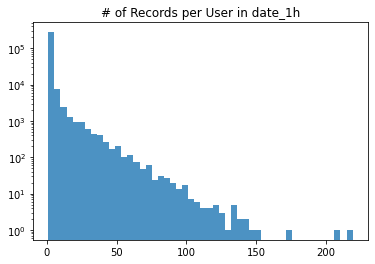

In [211]:
# Contando cantidad de datos por usuario

RANGO = "date_1h"
df_analysis = df.groupby(["ID_1","device_id",RANGO]).size().reset_index()
df_analysis.columns = ["ID_1","device_id",RANGO,"counts"]

print(f"Len df_test: {len(df)}")
print(f"Len df_analysis: {len(df_analysis)}")
plt.hist(df_analysis['counts'],bins=50,alpha=0.8)  
plt.title(F"# of Records per User in {RANGO}")
# plt.xscale('log')
plt.yscale('log')
plt.show()


In [215]:
RANGO = "date_1h"
df_t2 = df_analysis[df_analysis["counts"] < 5] #data que queremos quitar de df_tes
df_t2 = df_t2[["ID_1",RANGO]]
df_t3 = df.merge(df_t2, on = ["ID_1",RANGO], how = "outer", indicator = True)
df_t3 = df_t3.query('_merge != "both"')
df_t3

,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,longitude_FIN,t,distance,vel,date_1,date_3h,date_1h,hourTimeStamp,dayTimeStamp,_merge
51440,521915,1419,d70878c0edfa592561bf129496f0b85b5c3ce94441b2c3...,AAID,2022-01-12 13:27:11+00:00,2022-01-12 08:27:11,10.413774,-74.118935,CO-MAG,4.7,...,-74.118774,2.0,0.036059,64.906741,2022-01-12 08:27:11,2022-01-12 06:00:00,2022-01-12 08:00:00,8,12,left_only
51441,1125986,489,d70878c0edfa592561bf129496f0b85b5c3ce94441b2c3...,AAID,2022-01-12 13:27:13+00:00,2022-01-12 08:27:13,10.413491,-74.118774,CO-MAG,4.4,...,-74.118614,1.0,0.035715,128.573487,2022-01-12 08:27:13,2022-01-12 06:00:00,2022-01-12 08:00:00,8,12,left_only
51442,1071390,2315,d70878c0edfa592561bf129496f0b85b5c3ce94441b2c3...,AAID,2022-01-12 13:27:14+00:00,2022-01-12 08:27:14,10.413211,-74.118614,CO-MAG,4.2,...,-74.118220,5.0,0.089162,64.196752,2022-01-12 08:27:14,2022-01-12 06:00:00,2022-01-12 08:00:00,8,12,left_only
51443,832463,1498,d70878c0edfa592561bf129496f0b85b5c3ce94441b2c3...,AAID,2022-01-12 13:27:19+00:00,2022-01-12 08:27:19,10.412509,-74.118220,CO-MAG,4.3,...,-74.117805,6.0,0.096807,58.084489,2022-01-12 08:27:19,2022-01-12 06:00:00,2022-01-12 08:00:00,8,12,left_only
51444,1043848,221,d70878c0edfa592561bf129496f0b85b5c3ce94441b2c3...,AAID,2022-01-12 13:27:25+00:00,2022-01-12 08:27:25,10.411740,-74.117805,CO-MAG,4.4,...,-74.117670,2.0,0.031084,55.951387,2022-01-12 08:27:25,2022-01-12 06:00:00,2022-01-12 08:00:00,8,12,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576488,1327944,5224,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,AAID,2022-03-18 14:13:30+00:00,2022-03-18 09:13:30,5.303592,-73.582070,CO-CUN,5.0,...,-73.583824,40.0,0.934971,84.147369,2022-03-18 09:13:30,2022-03-18 09:00:00,2022-03-18 09:00:00,9,18,left_only
2576489,341689,4013,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,AAID,2022-03-18 14:14:10+00:00,2022-03-18 09:14:10,5.295367,-73.583824,CO-CUN,3.4,...,-73.583680,70.0,0.528751,27.192891,2022-03-18 09:14:10,2022-03-18 09:00:00,2022-03-18 09:00:00,9,18,left_only
2576490,626086,9435,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,AAID,2022-03-18 14:17:26+00:00,2022-03-18 09:17:26,5.289769,-73.583660,CO-CUN,3.3,...,-73.584015,56.0,0.262379,16.867222,2022-03-18 09:17:26,2022-03-18 09:00:00,2022-03-18 09:00:00,9,18,left_only
2576491,1696735,4297,c32b34afbfff1c77607adc2d6fb0d3b3eb625ccfb7f841...,AAID,2022-03-18 14:18:22+00:00,2022-03-18 09:18:22,5.287436,-73.584015,CO-CUN,3.1,...,-73.584360,70.0,0.781079,40.169794,2022-03-18 09:18:22,2022-03-18 09:00:00,2022-03-18 09:00:00,9,18,left_only


In [216]:
df_test = df_t3.copy()
# df_test = df.copy()
print(len(df_test))

79443


,Road_right,ID_1,date_1h,speed,speed_std,count
0,Bolivar_Valledupar,201,2022-01-07 14:00:00,69.859706,NaN,7
1,Bolivar_Valledupar,201,2022-01-11 06:00:00,50.995461,NaN,16
2,Bolivar_Valledupar,201,2022-01-21 17:00:00,40.142938,NaN,17
3,Bolivar_Valledupar,201,2022-01-24 08:00:00,35.598205,NaN,24
4,Bolivar_Valledupar,201,2022-01-28 07:00:00,37.110768,NaN,31


5700


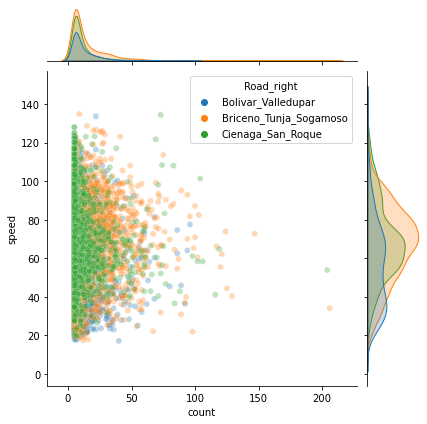

In [219]:
# speed average, and recrods per user in each road 
df_freq_id = df_test.copy()
df_freq_id["count"] = 1

RANGO = "date_1h"

df_freq_id = df_freq_id.groupby(["Road_right","ID_1","device_id",RANGO]).agg(
    speed = ("vel","mean"),
    speed_std = ("vel", "std"),
    count = ("count","sum")
    ).reset_index()

df_freq_id = df_freq_id.groupby(["Road_right","ID_1",RANGO]).agg(
    speed = ("speed","mean"),
    speed_std = ("speed", "std"),
    count = ("count","sum")
    ).reset_index()

# df_freq_id = df_freq_id[(df_freq_id["speed_std"] < 20) & (df_freq_id["speed_std"].notna())]

display(df_freq_id.head())
print(len(df_freq_id))


fig = px.scatter(df_freq_id, x="count", y="speed", color = "Road_right", 
                 hover_data = ["speed_std","ID_1",RANGO], 
                 opacity = 0.3,
                 marginal_y = "histogram",
                 marginal_x = "histogram")
fig.update_layout(
    width = 1000,)
fig.show()



#Plotting records vs speed
g = sns.jointplot(data=df_freq_id, 
                  x="count", 
                  y="speed", 
                  alpha=0.3,
                  color = 'b',
                  hue = "Road_right")
# plt.yscale("log")
# plt.xscale("log")
plt.show()




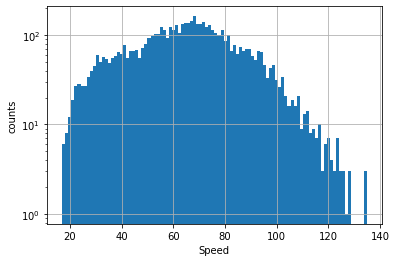

In [220]:
df_freq_id["speed"].hist(bins = 100)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Speed")
plt.ylabel("counts")
plt.show()

# Comparison

### Disaggregated

In [225]:
df_dis = get_all_dis()
df_dis.loc[:,'date_1']=df_dis['timestamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #convert str to timestamp
df_dis['date_3h'] = df_dis['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, 3*(dt.hour // 3)))
df_dis['date_1h'] = df_dis['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour // 3))

RANGO = "date_1h"
df_dis["hourTimeStamp"] = df_dis[RANGO].dt.hour

df_dis.head()

,Unnamed: 0,start_x,start_y,end_x,end_y,id,road,length,duration,distance,timestamp,speed,time_slot,id_general,date_1,date_3h,date_1h,hourTimeStamp
0,0,-74.215090,11.001896,-74.175485,10.962753,1,Cienaga_San_Roque,6171.831,382.730,6191.192,2022-08-12 05:00:00,58.052914,15,1Cienaga_San_Roque,2022-08-12 05:00:00,2022-08-12 03:00:00,2022-08-12 01:00:00,1
1,1,-73.532849,9.370901,-73.523093,9.338208,2,Cienaga_San_Roque,3771.547,298.768,3794.159,2022-08-12 05:00:00,45.445192,15,2Cienaga_San_Roque,2022-08-12 05:00:00,2022-08-12 03:00:00,2022-08-12 01:00:00,1
2,2,-73.559186,9.464616,-73.546034,9.416301,3,Cienaga_San_Roque,5586.658,275.233,5617.587,2022-08-12 05:00:00,73.072520,15,3Cienaga_San_Roque,2022-08-12 05:00:00,2022-08-12 03:00:00,2022-08-12 01:00:00,1
3,3,-73.965240,10.173329,-73.951025,10.144077,4,Cienaga_San_Roque,3607.565,339.088,3627.328,2022-08-12 05:00:00,38.300482,15,4Cienaga_San_Roque,2022-08-12 05:00:00,2022-08-12 03:00:00,2022-08-12 01:00:00,1
4,4,-73.951029,10.144077,-73.937540,10.097131,5,Cienaga_San_Roque,5402.751,290.149,5434.581,2022-08-12 05:00:01,67.034191,15,5Cienaga_San_Roque,2022-08-12 05:00:01,2022-08-12 03:00:00,2022-08-12 01:00:00,1


In [226]:
df_dis = df_dis.groupby(["id","hourTimeStamp"]).agg(
    speed = ("speed","mean"),
    speed_std = ("speed","std")).reset_index()

df_dis = df_dis[(df_dis["speed"].notna()) & (df_dis["speed"] < 150) & (df_dis["speed"] >15)] #Pues hay velocidades muy altas, ej: id 135 el 07-05 de 2022
    
# MERGE INDICES DISAGGREGATED-V2V3
df_v2v3 = pd.read_csv("../../idv2_idv3.csv") # id_2 Road_2 son las columnas de los segmentos que estamos analizando
df_dis = df_dis.merge(df_v2v3, left_on = "id", right_on = "id")[["id_2","hourTimeStamp","speed","speed_std"]]
df_dis["id_2"] = df_dis["id_2"].astype(str)


df_dis.sort_values(by = ["id_2","hourTimeStamp"], inplace = True)
df_dis


,id_2,hourTimeStamp,speed,speed_std
0,1,1,44.588563,14.827416
3,1,2,44.208292,14.106949
6,1,3,43.949220,15.072246
9,1,4,44.215723,14.904510
12,1,5,45.565076,14.478785
...,...,...,...,...
2062,99,3,57.793720,26.713900
2064,99,4,58.964671,26.700878
2066,99,5,59.394295,26.733640
2068,99,6,59.930046,27.478427


In [249]:
df_dis[df_dis["id_2"] == 157]

,id_2,hourTimeStamp,speed,speed_std


### trajectories

17.072689584718844
134.96858555923546


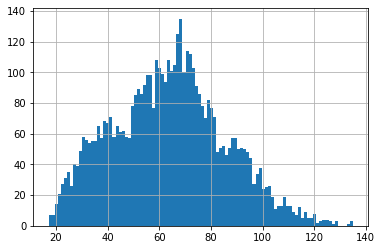

17.072689584718844
134.83063333392536


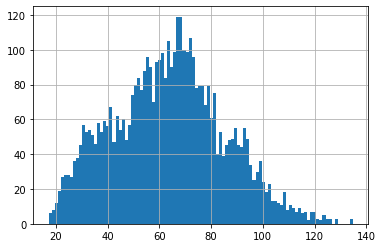

17.81413783903467
133.66592541842272


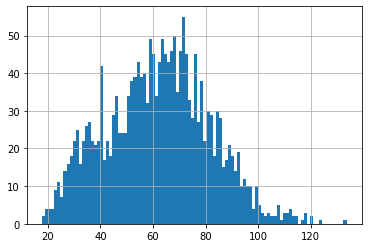

,Road_right,ID_1,hourTimeStamp,speed,speed_std
1405,Cienaga_San_Roque,1,6,51.950356,6.935438
1406,Cienaga_San_Roque,1,7,61.693806,6.706774
1407,Cienaga_San_Roque,1,8,58.310207,6.619053
1408,Cienaga_San_Roque,1,9,55.165540,8.902347
1409,Cienaga_San_Roque,1,10,58.489512,7.618954
...,...,...,...,...,...
547,Bolivar_Valledupar,336,14,60.130397,9.945624
548,Bolivar_Valledupar,336,15,63.252479,12.418622
549,Bolivar_Valledupar,336,16,63.250037,6.038551
550,Bolivar_Valledupar,336,17,64.150578,2.127999


In [244]:
RANGO = "date_1h"

df_mean_speeds_id = df_test.groupby(["Road_right","ID_1","device_id",RANGO,"hourTimeStamp"]).agg(
    speed = ("vel","mean"),
    speed_std = ("vel","std")).reset_index()

df_mean_speeds_id = df_mean_speeds_id[(df_mean_speeds_id["speed_std"] < 20) & (df_mean_speeds_id["speed_std"].notna())]

print(df_mean_speeds_id["speed"].min())
print(df_mean_speeds_id["speed"].max())
df_mean_speeds_id["speed"].hist(bins = 100), plt.show()

df_mean_speeds_id = df_mean_speeds_id.groupby(["Road_right","ID_1",RANGO,"hourTimeStamp"]).agg(
    speed = ("speed",stats.hmean),
    speed_std = ("speed","std")).reset_index()

print(df_mean_speeds_id["speed"].min())
print(df_mean_speeds_id["speed"].max())
df_mean_speeds_id["speed"].hist(bins = 100), plt.show()

# display(df_mean_speeds_id.head())
# print(len(df_mean_speeds_id[(df_mean_speeds_id["speed_std"] < 20) & (df_mean_speeds_id["speed_std"].notna())]))
# df_mean_speeds_id = df_mean_speeds_id[(df_mean_speeds_id["speed_std"] < 20) & (df_mean_speeds_id["speed_std"].notna())]

df_mean_speeds_id = df_mean_speeds_id.groupby(["Road_right","ID_1","hourTimeStamp"]).agg(
    speed = ("speed",stats.hmean),
    speed_std = ("speed","std")).reset_index()

print(df_mean_speeds_id["speed"].min())
print(df_mean_speeds_id["speed"].max())
df_mean_speeds_id["speed"].hist(bins = 100), plt.show()

# df_mean_speeds_id = df_mean_speeds_id[df_mean_speeds_id["speed_std"].notna()]
# df_mean_speeds_id = df_mean_speeds_id[(df_mean_speeds_id["speed_std"] < 15) & (df_mean_speeds_id["speed_std"].notna())]

df_mean_speeds_id.sort_values(by = ["ID_1","hourTimeStamp"], inplace = True)
df_mean_speeds_id

### merge

,Road_right,ID_1,hourTimeStamp,speed_x,speed_std_x,id_2,speed_y,speed_std_y
0,Cienaga_San_Roque,1,6,51.950356,6.935438,1,45.218061,15.303699
1,Cienaga_San_Roque,1,7,61.693806,6.706774,1,46.887939,13.570460
2,Cienaga_San_Roque,3,6,99.167056,NaN,3,76.404823,10.287655
3,Cienaga_San_Roque,6,6,74.007194,NaN,6,61.606331,12.621469
4,Cienaga_San_Roque,6,7,56.861583,9.327999,6,50.590840,22.000136


20.675813086621368
124.21336392010548


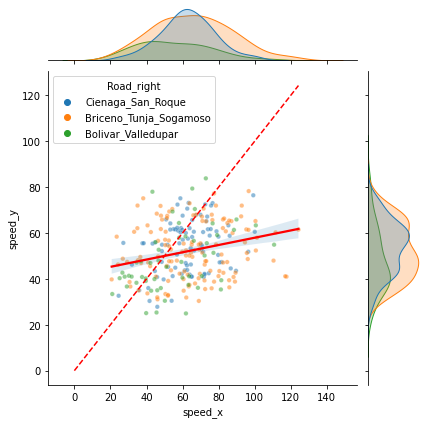

<Figure size 432x288 with 0 Axes>

In [261]:
df_mean_speeds_id["ID_1"] = df_mean_speeds_id["ID_1"].astype(str)
df_dis["id_2"] = df_dis["id_2"].astype(str)

df_merge_id = df_mean_speeds_id.merge(df_dis, left_on = ["ID_1","hourTimeStamp"], right_on = ["id_2","hourTimeStamp"], how = "inner")

# df_merge_id = df_merge_id[df_merge_id["hourTimeStamp"] > 8] 
display(df_merge_id.head())
print(df_merge_id["speed_x"].min())
print(df_merge_id["speed_x"].max())

plot_corr_join(data = df_merge_id, 
               x = "speed_x", 
               y = "speed_y",
               hue = "Road_right",
               alpha = 0.5,
               s = 20,
            #    edgecolor = "gray"
               )

plt.xlabel("latlon")
plt.ylabel("outlo")
plt.show()


plt.figure()
fig = px.scatter(df_merge_id, x="speed_x", y="speed_y", 
                #  color = "Road_right", 
                 symbol = "hourTimeStamp",
                 hover_data = ["Road_right","ID_1","hourTimeStamp",	"speed_x", "speed_y"],                 
                 opacity = 0.5,
                #  marginal_y = "histogram",
                #  marginal_x = "histogram"
                 )

fig.update_layout(
    height = 500,
    width = 500,
    yaxis_range = [10,160],
    xaxis_range = [10,160]
    )

fig.show()

plt.show()

In [254]:
# df_merge_id[df_merge_id["ID_1"] == 218]
df_merge_id[df_merge_id["speed_x"] > 100]

,Road_right,ID_1,hourTimeStamp,speed_x,speed_std_x,id_2,speed_y,speed_std_y
92,Briceno_Tunja_Sogamoso,110,7,100.385980,7.997048,110,65.168458,7.879605
98,Briceno_Tunja_Sogamoso,115,6,117.574084,11.316474,115,40.957214,15.699927
135,Briceno_Tunja_Sogamoso,142,6,100.606008,NaN,142,52.344001,22.737914
155,Briceno_Tunja_Sogamoso,157,7,110.401203,19.198688,157,47.935363,31.576016
157,Briceno_Tunja_Sogamoso,158,7,116.890620,NaN,158,41.122942,19.155540
180,Briceno_Tunja_Sogamoso,175,6,101.233573,NaN,175,57.915144,19.759694
184,Briceno_Tunja_Sogamoso,178,7,124.213364,NaN,178,61.436131,22.253585
189,Briceno_Tunja_Sogamoso,181,7,111.558549,15.807753,181,60.245206,21.816359
231,Bolivar_Valledupar,232,7,110.704019,NaN,232,54.869160,19.498730
245,Bolivar_Valledupar,265,6,100.585009,NaN,265,63.298845,27.918831


In [258]:
df_dis[df_dis["id_2"] == "157"]

,id_2,hourTimeStamp,speed,speed_std
1135,157,1,47.648819,31.510437
1138,157,2,44.596255,29.791417
1141,157,3,43.086608,28.908936
1144,157,4,43.451566,28.983206
1147,157,5,43.868787,29.184932
1150,157,6,45.878670,30.352473
1153,157,7,47.935363,31.576016


In [255]:
df_merge_id[df_merge_id["ID_1"] == "157"]

,Road_right,ID_1,hourTimeStamp,speed_x,speed_std_x,id_2,speed_y,speed_std_y
155,Briceno_Tunja_Sogamoso,157,7,110.401203,19.198688,157,47.935363,31.576016


In [257]:
df_ID_prueba = df_test[df_test["ID_1"] == 157]

df_ID_prueba["count"] = 1

RANGO = "date_1h"

display(df_ID_prueba)
print(len(df_ID_prueba))
print('-'*20)

df_ID_prueba = df_ID_prueba.groupby(["Road_right","ID_1","device_id",RANGO,"hourTimeStamp"]).agg(
    speed = ("vel","mean"),
    speed_std = ("vel", "std"),
    count = ("count","sum")
    ).reset_index()

display(df_ID_prueba)
print(len(df_ID_prueba))
df_ID_prueba = df_ID_prueba[(df_ID_prueba["speed_std"].notna()) & (df_ID_prueba["speed_std"] < 20)]
print("Filtrando...",len(df_ID_prueba))
print('-'*20)

df_ID_prueba = df_ID_prueba.groupby(["Road_right","ID_1",RANGO, "hourTimeStamp"]).agg(
    speed = ("speed",stats.hmean),
    speed_std = ("speed", "std"),
    count = ("count","sum")
    ).reset_index()

display(df_ID_prueba)
print(len(df_ID_prueba))
print('-'*20)

df_ID_prueba = df_ID_prueba.groupby(["Road_right","ID_1","hourTimeStamp"]).agg(
    speed = ("speed",stats.hmean),
    speed_std = ("speed", "std"),
    count = ("count","sum")
    ).reset_index()

display(df_ID_prueba)
print(len(df_ID_prueba))
print('-'*20)

/var/folders/vk/14ym66kj4_d9xkr_w6f6cr7w0000gn/T/ipykernel_25927/4044056322.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Unnamed: 0.1,device_id,platform,timestamp,local_location_at,latitude,longitude,iso_region,horizontal_accuracy,...,t,distance,vel,date_1,date_3h,date_1h,hourTimeStamp,dayTimeStamp,_merge,count
1094145,113581,1157,c2d86233518ce6a04033837cfc9fd418c29f4afe85e835...,AAID,2022-01-05 13:43:00+00:00,2022-01-05 08:43:00,5.148403,-73.683914,CO-CUN,6.4,...,2.0,0.059014,106.225594,2022-01-05 08:43:00,2022-01-05 06:00:00,2022-01-05 08:00:00,8,5,left_only,1
1094146,675052,261,c2d86233518ce6a04033837cfc9fd418c29f4afe85e835...,AAID,2022-01-05 13:43:02+00:00,2022-01-05 08:43:02,5.148209,-73.684410,CO-CUN,1.5,...,2.0,0.032609,58.696530,2022-01-05 08:43:02,2022-01-05 06:00:00,2022-01-05 08:00:00,8,5,left_only,1
1094147,51042,2749,c2d86233518ce6a04033837cfc9fd418c29f4afe85e835...,AAID,2022-01-05 13:43:04+00:00,2022-01-05 08:43:04,5.148092,-73.684680,CO-CUN,3.2,...,2.0,0.034907,62.833397,2022-01-05 08:43:04,2022-01-05 06:00:00,2022-01-05 08:00:00,8,5,left_only,1
1094148,348117,936,c2d86233518ce6a04033837cfc9fd418c29f4afe85e835...,AAID,2022-01-05 13:43:06+00:00,2022-01-05 08:43:06,5.147969,-73.684970,CO-CUN,7.5,...,2.0,0.038149,68.668058,2022-01-05 08:43:06,2022-01-05 06:00:00,2022-01-05 08:00:00,8,5,left_only,1
1094149,601316,1711,c2d86233518ce6a04033837cfc9fd418c29f4afe85e835...,AAID,2022-01-05 13:43:08+00:00,2022-01-05 08:43:08,5.147842,-73.685290,CO-CUN,9.7,...,106.0,1.828719,62.107428,2022-01-05 08:43:08,2022-01-05 06:00:00,2022-01-05 08:00:00,8,5,left_only,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551776,972378,5853,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,IDFA,2022-04-12 11:32:54+00:00,2022-04-12 06:32:54,5.150496,-73.678215,CO-CUN,4.8,...,2.0,0.042044,75.678677,2022-04-12 06:32:54,2022-04-12 06:00:00,2022-04-12 06:00:00,6,12,left_only,1
2551777,939752,3799,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,IDFA,2022-04-12 11:32:56+00:00,2022-04-12 06:32:56,5.150362,-73.678570,CO-CUN,4.8,...,3.0,0.043913,52.695624,2022-04-12 06:32:56,2022-04-12 06:00:00,2022-04-12 06:00:00,6,12,left_only,1
2551778,623470,3551,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,IDFA,2022-04-12 11:32:59+00:00,2022-04-12 06:32:59,5.150220,-73.678940,CO-CUN,4.8,...,2.0,0.066347,119.424514,2022-04-12 06:32:59,2022-04-12 06:00:00,2022-04-12 06:00:00,6,12,left_only,1
2551779,1053486,725,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,IDFA,2022-04-12 11:33:01+00:00,2022-04-12 06:33:01,5.150008,-73.679500,CO-CUN,4.8,...,17.0,0.368224,77.976831,2022-04-12 06:33:01,2022-04-12 06:00:00,2022-04-12 06:00:00,6,12,left_only,1


491
--------------------


,Road_right,ID_1,device_id,date_1h,hourTimeStamp,speed,speed_std,count
0,Briceno_Tunja_Sogamoso,157,11fb20bafb0427e55041e877a2f25f071db70f9b05b6a6...,2022-02-02 14:00:00,14,85.059745,27.761611,12
1,Briceno_Tunja_Sogamoso,157,202cb5d0211360a66de358ab5418eca3705e147f78a731...,2022-04-11 18:00:00,18,64.139283,20.308269,12
2,Briceno_Tunja_Sogamoso,157,2f69f714b20101c23d5ed8aa778b2f96d7259626c061a5...,2022-02-21 16:00:00,16,77.868731,12.777986,22
3,Briceno_Tunja_Sogamoso,157,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,2022-03-04 17:00:00,17,70.493321,17.484061,34
4,Briceno_Tunja_Sogamoso,157,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,2022-03-19 08:00:00,8,58.621439,25.850427,12
5,Briceno_Tunja_Sogamoso,157,377d7622250b8b149e86d74f5dfa14a6dcb3a8731f12bb...,2022-04-12 06:00:00,6,85.214129,26.472397,13
6,Briceno_Tunja_Sogamoso,157,54bf2c33ca9e8c0cc74a533dec9096276ea90faadabde8...,2022-04-02 12:00:00,12,80.776510,18.536899,11
7,Briceno_Tunja_Sogamoso,157,64cde995c14815686b9bb84547c77a77a3208192fbee30...,2022-04-12 16:00:00,16,80.215314,4.915168,14
8,Briceno_Tunja_Sogamoso,157,6c877dccfdab4b4e5b5e2150323f751dff46f78afcd8c1...,2022-03-17 07:00:00,7,98.470494,7.559572,11
9,Briceno_Tunja_Sogamoso,157,800ede9757d0e5b9a79ab3a4e8a824b6cceb766af39c83...,2022-01-16 14:00:00,14,92.813406,18.951521,5


25
Filtrando... 16
--------------------


,Road_right,ID_1,date_1h,hourTimeStamp,speed,speed_std,count
0,Briceno_Tunja_Sogamoso,157,2022-01-05 08:00:00,8,71.706202,NaN,5
1,Briceno_Tunja_Sogamoso,157,2022-01-15 09:00:00,9,33.960312,1.906834,206
2,Briceno_Tunja_Sogamoso,157,2022-01-16 14:00:00,14,92.813406,NaN,5
3,Briceno_Tunja_Sogamoso,157,2022-01-27 17:00:00,17,88.584492,NaN,7
4,Briceno_Tunja_Sogamoso,157,2022-02-21 16:00:00,16,77.868731,NaN,22
5,Briceno_Tunja_Sogamoso,157,2022-02-22 11:00:00,11,59.196606,NaN,8
6,Briceno_Tunja_Sogamoso,157,2022-02-23 17:00:00,17,39.427137,NaN,10
7,Briceno_Tunja_Sogamoso,157,2022-02-27 07:00:00,7,125.621538,NaN,25
8,Briceno_Tunja_Sogamoso,157,2022-03-04 17:00:00,17,70.493321,NaN,34
9,Briceno_Tunja_Sogamoso,157,2022-03-17 07:00:00,7,98.470494,NaN,11


13
--------------------


,Road_right,ID_1,hourTimeStamp,speed,speed_std,count
0,Briceno_Tunja_Sogamoso,157,7,110.401203,19.198688,36
1,Briceno_Tunja_Sogamoso,157,8,71.706202,NaN,5
2,Briceno_Tunja_Sogamoso,157,9,33.960312,NaN,206
3,Briceno_Tunja_Sogamoso,157,11,59.196606,NaN,8
4,Briceno_Tunja_Sogamoso,157,12,80.776510,NaN,11
5,Briceno_Tunja_Sogamoso,157,13,60.081760,NaN,8
6,Briceno_Tunja_Sogamoso,157,14,92.813406,NaN,5
7,Briceno_Tunja_Sogamoso,157,16,72.359898,7.275930,54
8,Briceno_Tunja_Sogamoso,157,17,59.011393,24.862434,51


9
--------------------
